In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

TAR_PATH = "/home/yifan/experiments/backdoor/resnet18_CIFAR10_target_5/experiment2"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"

ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis2'

DEVICE='cuda:1'
########## initulize reference data and target data
from AlignVis.DataInit import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
tar_datainit = DataInit(TAR_PATH,TAR_PATH,TAR_EPOCH,DEVICE)
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH,DEVICE)

ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from AlignVis.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from AlignVis_Visualizer.visualizer import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 448.40it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 5438.84it/s]


absolute alignment indicates number: 1 label diff indicates number: 509 confidence diff indicates number: 9 high distance number: 10133


In [18]:
from AlignVis.autoencoder_generator import AutoEncoderGenerator
AutoEncoder_Generator = AutoEncoderGenerator(REF_PATH, REF_PATH, TAR_PATH, TAR_PATH, 200,200, projector, DEVICE)
import os
if os.path.exists(os.path.join(TAR_PATH, "pre_autoencoder.npy")):
    print("continue")
    autoencoder = AutoEncoder_Generator.encoder_trainer_with_pre_trained(os.path.join(TAR_PATH, "pre_autoencoder.npy"), os.path.join(TAR_PATH, "pre_autoencoder.npy"),batch_size=500,num_epochs=5,learning_rate=1e-2,label_flip_rate=0.1)
else:
    print("new one")
    autoencoder = AutoEncoder_Generator.encoder_trainer(os.path.join(TAR_PATH, "pre_autoencoder.npy"),batch_size=500,num_epochs=1,learning_rate=1e-2)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8566.17it/s]

NET resnet18


Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8214.20it/s]


continue
NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8336.99it/s]

NET resnet18
Finish initialization...



100%|██████████| 3/3 [00:00<00:00, 6553.60it/s]


Epoch [1/5], Loss: 19.0865, Loss decoder: 0.0007,Loss encoder: 0.0019,flip_loss: 76.84456634521484,pred_loss:8.001265525817871,loss_contrastive338.34593841552737,cka_loss0.014786661602556705


100%|██████████| 3/3 [00:00<00:00, 7367.04it/s]


Epoch [2/5], Loss: 17.3580, Loss decoder: 0.0006,Loss encoder: 0.0018,flip_loss: 72.9862289428711,pred_loss:7.441011428833008,loss_contrastive260.4125419006348,cka_loss0.011770606972277164


100%|██████████| 3/3 [00:00<00:00, 7375.68it/s]


Epoch [3/5], Loss: 16.3230, Loss decoder: 0.0006,Loss encoder: 0.0018,flip_loss: 67.6171646118164,pred_loss:7.169713020324707,loss_contrastive237.66114184570313,cka_loss0.012470962479710579


100%|██████████| 3/3 [00:00<00:00, 7133.17it/s]


Epoch [4/5], Loss: 17.4025, Loss decoder: 0.0006,Loss encoder: 0.0018,flip_loss: 69.70384216308594,pred_loss:7.188046455383301,loss_contrastive323.0383150024414,cka_loss0.011243701912462711


100%|██████████| 3/3 [00:00<00:00, 7375.68it/s]

Epoch [5/5], Loss: 16.6892, Loss decoder: 0.0006,Loss encoder: 0.0018,flip_loss: 68.5714111328125,pred_loss:6.9443817138671875,loss_contrastive287.47968576049806,cka_loss0.010465622879564762


In [8]:
import os
ref_border_path = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_ref_border.npy")
tar_border_path = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_tar_border.npy")
if os.path.exists(ref_border_path) and os.path.exists(tar_border_path):
    print("aaa")
    ref_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_ref_border.npy")
    ref_features = np.load(ref_border_centers_loc).squeeze()
    tar_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_tar_border.npy")
    tar_features = np.load(tar_border_centers_loc).squeeze()

aaa


In [19]:
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)
eval.eval_boundary_nn_ref_in_ref(ref_features)

#train# boundary preserving: 1.46/15 in epoch 200


1.45892

In [3]:

####### generate boundary ponits for tar and ref respectively
from AlignVis.AlignmentBoundaryGenerator import AlignmentBoundaryGenerator
BoundaryGen = AlignmentBoundaryGenerator(REF_PATH,REF_PATH,TAR_PATH,TAR_PATH,REF_EPOCH,TAR_EPOCH,DEVICE)
ref_boundary,tar_boundary = BoundaryGen.get_boundary_point(DEVICE,num_adv_eg=2000)
import torch
###### get border sample features
import torch.nn as nn

ref_feature_model = ref_model.to(DEVICE)
ref_feature_model = nn.Sequential(*list(ref_feature_model.children())[:-1])
with torch.no_grad():
    features = ref_feature_model(ref_boundary)
    ref_features = features.view(ref_boundary.shape[0], -1).cpu().numpy()

###### get border sample features
tar_feature_model = tar_model.to(DEVICE)
tar_feature_model = nn.Sequential(*list(tar_feature_model.children())[:-1])
with torch.no_grad():
    tar_features = tar_feature_model(tar_boundary)
    tar_features = tar_features.view(tar_boundary.shape[0], -1).cpu().numpy()

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8653.19it/s]


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:01<00:00, 130.44it/s]


conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (4998, 10) (5000, 10) (4998, 10) (5000, 10)
conf1 (4998, 10) (4999, 10) (4998, 10) (4999, 10)
conf1 (4999, 10) (5000, 10) (4999, 10) (5000, 10)
conf1 (4998, 10) (4999, 10) (4998, 10) (4999, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (4999, 10) (4999, 10) (4999, 10) (4999, 10)
conf1 (4999, 10) (4997, 10) (4999, 10) (4997, 10)
conf1 (4997, 10) (4999, 10) (4997, 10) (4999, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (4999, 10) (4999, 10) (4999, 10) (4999, 10)
conf1 (4998, 10) (4999, 10) (4998, 10) (4999, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (4500, 10) (4999, 10) (4500, 10) (4999, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (4500, 10) (4999, 10) (4500, 10) (4999, 10)
conf1 (4999, 10) (4999, 10) (4999, 10) (4999, 10)
conf1 (4500, 10) (4998, 10) (4500, 10) (4998, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (5000, 10) (4997, 10) (5000, 10) (4997, 10)


In [28]:
####### add boundary sample to train
import os
autoencoder, ref_features, tar_features = AutoEncoder_Generator.encoder_trainer_with_border(os.path.join(TAR_PATH, "pre_autoencoder.npy"),os.path.join(TAR_PATH, "pre_autoencoder_withborder.npy"),0.01,500,15,1e-3)

100%|██████████| 1/1 [00:00<00:00, 3785.47it/s]

Epoch [15/15], Loss: 0.6417, Loss decoder: 0.0004,Loss encoder: 0.0027,pred_loss:0.11723097413778305,cka_loss0.001830943045206368,flip_loss:63.560142517089844


In [4]:
eval.eval_boundary_nn_autoencoder(tar_features, autoencoder)

AttributeError: 'builtin_function_or_method' object has no attribute 'eval_boundary_nn_autoencoder'

In [7]:
import os
location_R = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_ref_border.npy")
location_T = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_tar_border.npy")
np.save(location_R, ref_features)
np.save(location_T, tar_features)

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8677.03it/s]


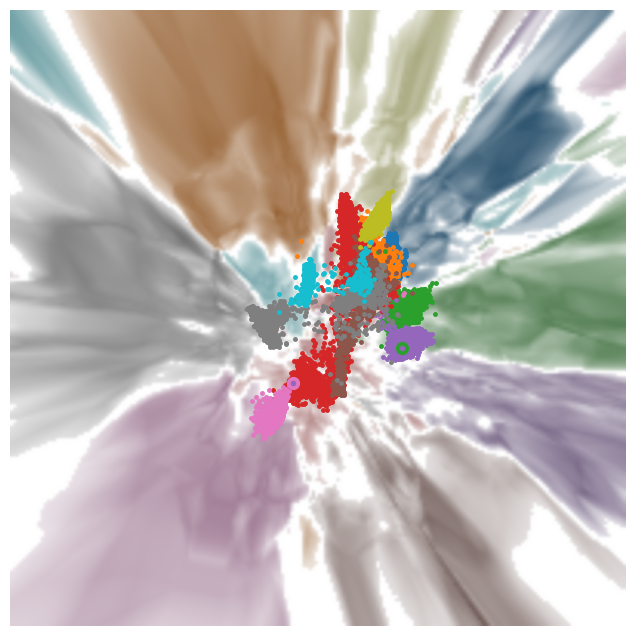

In [20]:
##### visuallize all data
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVis_Visualizer.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join(TAR_PATH, "vis.png"))

In [7]:
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)
# eval.eval_boundary_nn_autoencoder(tar_border_centers, autoencoder)

In [8]:
eval.eval_nn_train_autoencoder(15,autoencoder)

Fri May 12 11:44:44 2023 Building RP forest with 16 trees
Fri May 12 11:44:44 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Fri May 12 11:45:03 2023 Building RP forest with 16 trees
Fri May 12 11:45:03 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 1.19/15 in epoch 200


1.18558

In [30]:
eval.eval_ppr_autoencoder(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 7026.48it/s]

#train# autoencoder PPR: 0.78 in epoch 200


0.77906

In [13]:
eval.eval_boundary_nn_ref_in_ref(ref_features,15)

#train# boundary preserving: 1.42/15 in epoch 200


1.4205

In [17]:
eval.eval_boundary_nn_autoencoder(tar_features, autoencoder)

NameError: name 'tar_features' is not defined

In [11]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()
encoded_Y = autoencoder.encoder(torch.Tensor(tar_train_data))
encoded_Y = encoded_Y.detach().numpy()
# indicates = np.random.choice(aligned, size=10, replace=False)
indicates = np.random.choice(np.arange(5000), size=1000, replace=False)
print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(tar_train_data[indicates],encoded_Y[indicates]))

CKA between absolute alignmnet subset is: 0.983367932725422


In [12]:
eval.eval_move_direction_preserving(autoencoder,10,1.5)

100%|██████████| 250/250 [00:00<00:00, 6411.90it/s]


long distance move subet number is 20782, short distance move set number is 3


100%|██████████| 250/250 [00:00<00:00, 7245.80it/s]


all reference distance preserving 49919/50000
all target distance preserving 45504/50000
short distance move direction preserving 3/3
long distance move direction preserving 18864/20782


In [21]:
val_same, val_diff = eval.eval_prediction_preserving(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 8599.26it/s]

refere  predction preserving:46512/50000 0.93
target  predction preserving:31263/50000 0.63
ref&tar pred_same preserving:29900/49491 0.60
ref&tar pred_diff preserving:13/509 0.03


In [20]:
import os
location_R = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_ref_border.npy")
location_T = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_tar_border.npy")
np.save(location_R, ref_features)
np.save(location_T, tar_features)

In [11]:
ref_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_ref_border.npy")
ref_b_features = np.load(ref_border_centers_loc).squeeze()
tar_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_tar_border.npy")
tar_b_features = np.load(tar_border_centers_loc).squeeze()

In [13]:
eval.eval_boundary_nn_ref_in_ref(ref_b_features)

#train# boundary preserving: 1.49/15 in epoch 200


1.4875

In [14]:
eval.eval_boundary_nn_autoencoder(tar_b_features,autoencoder,15)

#train# boundary preserving: 1.41/15 in epoch 200


1.40938

In [13]:
def eval_boundary_align_sensitivity(autoencoder, tar_b_features, ref_b_features):
        ############## init ###################
        #init target
        print("123")
        tar_b_pred = tar_provider.get_pred(TAR_EPOCH, tar_b_features)
        tar_b_pred = tar_b_pred + 1e-8
        tar_sort_preds = np.sort(tar_b_pred, axis=1)
        tar_diff = (tar_sort_preds[:, -1] - tar_sort_preds[:, -2]) / (tar_sort_preds[:, -1] - tar_sort_preds[:, 0])
        tar_border = np.zeros(len(tar_diff), dtype=np.uint8) + 0.05
        tar_border[tar_diff < 0.15] = 1

        #init reference
        ref_b_pred = ref_provider.get_pred(REF_EPOCH, ref_b_features)
        ref_b_pred = ref_b_pred + 1e-8
        ref_sort_preds = np.sort(ref_b_pred, axis=1)
        ref_diff = (ref_sort_preds[:, -1] - ref_sort_preds[:, -2]) / (ref_sort_preds[:, -1] - ref_sort_preds[:, 0])
        ref_border = np.zeros(len(ref_diff), dtype=np.uint8) + 0.05
        ref_border[ref_diff < 0.15] = 1
        
        ##### get all boundary list
        all_boundary_list = []
        
        for i in range(len(ref_border)):
            if ref_border[i] == 1 and tar_border[i] == 1:
                all_boundary_list.append(i)
        print(len(all_boundary_list))
        #### get ref low dimensional border
        ref_b_embedding = projector.batch_project(REF_EPOCH, ref_b_features)
        ref_b_inv = projector.batch_inverse(REF_EPOCH,ref_b_embedding)
        ref_b_pred_l = ref_provider.get_pred(REF_EPOCH, ref_b_inv)
        ref_b_pred_l = ref_b_pred_l  + 1e-8
        ref_sort_preds_l  = np.sort(ref_b_pred_l , axis=1)
        ref_diff_l  = (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, -2]) / (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, 0])
        ref_border_l = np.zeros(len(ref_diff_l), dtype=np.uint8) + 0.05
        ref_border_l[ref_diff_l < 0.15] = 1
        
        #### get target low dimensional border
        tar_b_embedding = projector.batch_project(REF_EPOCH, autoencoder.encoder(torch.Tensor(ref_b_features)).detach().numpy())
        tar_b_inv = projector.batch_inverse(REF_EPOCH,tar_b_embedding)
        tar_b_inv = autoencoder.decoder(torch.Tensor(tar_b_inv)).detach().numpy()
        tar_b_pred_l = tar_provider.get_pred(REF_EPOCH, tar_b_inv)
        tar_b_pred_l = tar_b_pred_l  + 1e-8
        tar_sort_preds_l  = np.sort(tar_b_pred_l , axis=1)
        tar_diff_l  = (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, -2]) / (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, 0])
        tar_border_l = np.zeros(len(tar_diff_l), dtype=np.uint8) + 0.05
        tar_border_l[tar_diff_l < 0.15] = 1

        all_boundary_list_l = []
       
        all_change = []
        all_change_l=[]
      
        for i in range(len(ref_border)):
            ##### low dimension all border
            if ref_border_l[i] == 1 and tar_border_l[i] == 1:
                all_boundary_list_l.append(i)
            if ref_border[i] != tar_border[i]:
                 all_change.append(i)
            if ref_border[i] != tar_border[i] and tar_border_l[i] == tar_border[i]:
                 all_change_l.append(i)
                 
                 
           


        print("boundary sample preserving{}/{}".format(len(all_boundary_list_l),len(all_boundary_list)))
        print("boundary change preserving{}/{}".format(len(all_change_l),len(all_change)))
       
eval_boundary_align_sensitivity(autoencoder,np.concatenate((tar_train_data,tar_features),axis=0), np.concatenate((ref_train_data,ref_features),axis=0))      

123


100%|██████████| 260/260 [00:00<00:00, 6552.02it/s]

2000



100%|██████████| 260/260 [00:00<00:00, 7789.53it/s]

boundary sample preserving2781/2000
boundary change preserving5/305


In [17]:
eval.eval_move_direction_preserving(autoencoder,10,1.5)

100%|██████████| 250/250 [00:00<00:00, 8096.92it/s]


long distance move subet number is 20782, short distance move set number is 3


100%|██████████| 250/250 [00:00<00:00, 5903.18it/s]


all reference distance preserving 49919/50000
all target distance preserving 45504/50000
short distance move direction preserving 3/3
long distance move direction preserving 18864/20782


In [33]:
val_same, val_diff = eval.eval_prediction_preserving(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 7384.70it/s]

refere  predction preserving:46512/50000 0.93
target  predction preserving:38953/50000 0.78
ref&tar pred_same preserving:36733/49492 0.74
ref&tar pred_diff preserving:4/508 0.01
